In [1]:
import os
import pandas as pd

# Define the working directory
data_directory = "D:/Jupyter_projects/Hey-Savi_assignment/fashion-dataset"

if os.path.exists(data_directory):
    print(f"Data directory '{data_directory}' found.")
    print("Contents of the data directory:", os.listdir(data_directory))
else:
    raise FileNotFoundError(f"Data directory '{data_directory}' not found. Please check the path.")

# Load the styles CSV file with error handling
styles_path = os.path.join(data_directory, 'styles.csv')
try:
    data = pd.read_csv(styles_path, on_bad_lines='skip')
    print("\nDataset loaded successfully after skipping problematic rows.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Inspect the structure of the dataset
print("\nDataset Information:")
data.info()

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
data.head()


Data directory 'D:/Jupyter_projects/Hey-Savi_assignment/fashion-dataset' found.
Contents of the data directory: ['images', 'images.csv', 'styles', 'styles.csv']

Dataset loaded successfully after skipping problematic rows.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [2]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = data.drop_duplicates()

Number of duplicate rows: 0


In [3]:
import numpy as np

# Add a column for image file paths
data['image_path'] = data['id'].apply(lambda x: os.path.join(data_directory, 'images', f"{x}.jpg"))

# Check if all image files exist
data['image_exists'] = data['image_path'].apply(lambda x: os.path.exists(x))
missing_images = data[~data['image_exists']]
print(f"Number of missing images: {len(missing_images)}")

# Filter out rows with missing images
data = data[data['image_exists']]

# Display the updated dataframe
print("\nUpdated dataset after filtering missing images:")
print(data[['id', 'articleType', 'image_path']].head())

# Get unique classes for 'articleType'
classes = data['articleType'].unique()
print(f"\nNumber of unique product categories (classes): {len(classes)}")
print(f"Classes: {classes}")


Number of missing images: 5

Updated dataset after filtering missing images:
      id  articleType                                         image_path
0  15970       Shirts  D:/Jupyter_projects/Hey-Savi_assignment/fashio...
1  39386        Jeans  D:/Jupyter_projects/Hey-Savi_assignment/fashio...
2  59263      Watches  D:/Jupyter_projects/Hey-Savi_assignment/fashio...
3  21379  Track Pants  D:/Jupyter_projects/Hey-Savi_assignment/fashio...
4  53759      Tshirts  D:/Jupyter_projects/Hey-Savi_assignment/fashio...

Number of unique product categories (classes): 142
Classes: ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 'Shorts' 'Briefs' 'Sarees'
 'Perfume and Body Mist' 'Heels' 'Sunglasses' 'Innerwear Vests' 'Pendant'
 'Nail Polish' 'Laptop Bag' 'Scarves' 'Rain Jacket' 'Dresses'
 '

In [3]:
import cv2
import os
import pandas as pd

# Load the dataset metadata
data_directory = 'fashion-dataset'
styles_path = os.path.join(data_directory, 'styles.csv')
try:
    data = pd.read_csv(styles_path, on_bad_lines='skip')
    print("\nDataset loaded successfully after skipping problematic rows.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Filter for topwear images
filtered_data = data[data['subCategory'] == 'Topwear']

# Apply Canny edge detection to enhance neckline features
def apply_canny_edge(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None  # Handle missing or unreadable images
    edges = cv2.Canny(image, threshold1=100, threshold2=200)
    return edges

# Process all topwear images
filtered_data['image_path'] = filtered_data['id'].apply(lambda x: os.path.join(data_directory, 'images', f"{x}.jpg"))
output_directory = os.path.join(data_directory, 'processed_images')
os.makedirs(output_directory, exist_ok=True)

for idx, row in filtered_data.iterrows():
    image_path = row['image_path']
    edges = apply_canny_edge(image_path)
    if edges is not None:
        output_path = os.path.join(output_directory, f"{row['id']}_edges.jpg")
        cv2.imwrite(output_path, edges)

print("Canny edge detection applied and saved for topwear images.")



Dataset loaded successfully after skipping problematic rows.


C:\Users\svaid\AppData\Local\Temp\ipykernel_24592\3267764868.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['image_path'] = filtered_data['id'].apply(lambda x: os.path.join(data_directory, 'images', f"{x}.jpg"))


Canny edge detection applied and saved for topwear images.


In [5]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import glob

class UnlabeledDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_paths = glob.glob(os.path.join(image_dir, "*.jpg"))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img

# Define transformations (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load processed images with custom dataset loader
image_dir = 'fashion-dataset/processed_images'
dataset = UnlabeledDataset(image_dir=image_dir, transform=transform)

print(f"Loaded {len(dataset)} unlabeled images.")


Loaded 15398 unlabeled images.


In [7]:
import torchvision.transforms as T
dino_model = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')

# Set model to evaluation mode
dino_model.eval()

# Define image transformations for DINO
transform = T.Compose([
    T.Resize((224, 224)),   # Resize image
    T.ToTensor(),           # Convert to tensor
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

Using cache found in C:\Users\svaid/.cache\torch\hub\facebookresearch_dino_main


In [8]:
import os
import numpy as np
from PIL import Image
import torch
from torchvision import transforms

def extract_features(image_path, model, transform):
    """
    Extract feature vector from an image using DINO.
    Args:
        image_path (str): Path to the image file.
        model (torch.nn.Module): Pre-trained DINO model.
        transform (torchvision.transforms.Compose): Transformations for preprocessing.
    Returns:
        np.ndarray: Feature vector extracted from the image.
    """
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    
    with torch.no_grad():
        features = model(image)  # Get feature vector
    
    return features.squeeze().cpu().numpy()  # Convert to NumPy array

# Directory containing processed images (Canny edge-detected)
PROCESSED_IMAGE_DIR = 'fashion-dataset/processed_images'

# Define transformations for DINO
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match DINO input size
    transforms.ToTensor(),         # Convert to tensor
])

# Iterate through all processed images in the directory
features = []
for img_file in os.listdir(PROCESSED_IMAGE_DIR):
    img_path = os.path.join(PROCESSED_IMAGE_DIR, img_file)
    if os.path.isfile(img_path):  # Ensure it's a file
        features.append(extract_features(img_path, dino_model, transform))

# Convert features list to NumPy array for clustering or further processing
features = np.array(features)
print(f"Extracted features for {len(features)} images.")


Extracted features for 15398 images.


In [16]:
import os
import numpy as np
from PIL import Image
import torch
from torchvision import transforms

def extract_features(image_path, model, transform):
    """
    Extract feature vector from an image using DINO.
    Args:
        image_path (str): Path to the image file.
        model (torch.nn.Module): Pre-trained DINO model.
        transform (torchvision.transforms.Compose): Transformations for preprocessing.
    Returns:
        np.ndarray: Feature vector extracted from the image.
    """
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    
    with torch.no_grad():
        features = model(image)  # Get feature vector
    
    return features.squeeze().cpu().numpy()  # Convert to NumPy array

# Directory containing normal images
IMAGE_DIR = 'fashion-dataset/images'

# Define transformations for DINO
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match DINO input size
    transforms.ToTensor(),         # Convert to tensor
])

# Iterate through all processed images in the directory
norm_features = []
for img_file in os.listdir(IMAGE_DIR):
    img_path = os.path.join(IMAGE_DIR, img_file)
    if os.path.isfile(img_path):  # Ensure it's a file
        norm_features.append(extract_features(img_path, dino_model, transform))

# Convert features list to NumPy array for clustering or further processing
norm_features = np.array(norm_features)
print(f"Extracted features for {len(norm_features)} images.")
np.save('norm_features.npy', norm_features)

Extracted features for 44441 images.


In [12]:
np.save('features.npy', features)

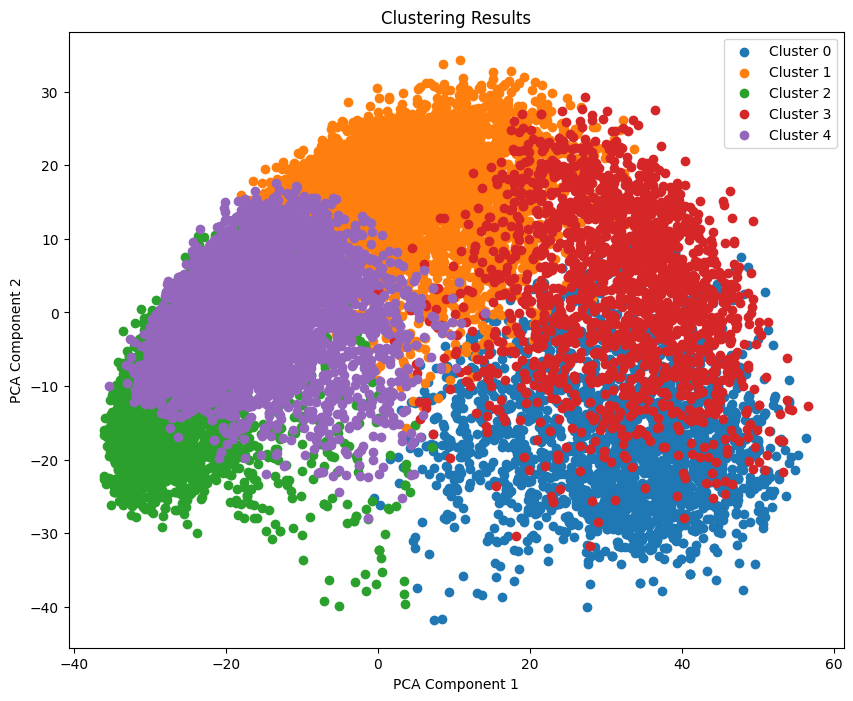

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'features' is a NumPy array containing extracted features
# Example: features = np.load('features.npy')

# Step 1: Perform K-Means clustering
num_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_

# Step 2: Perform PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
reduced_features = pca.fit_transform(features)

# Step 3: Plot the clustering results
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_features[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


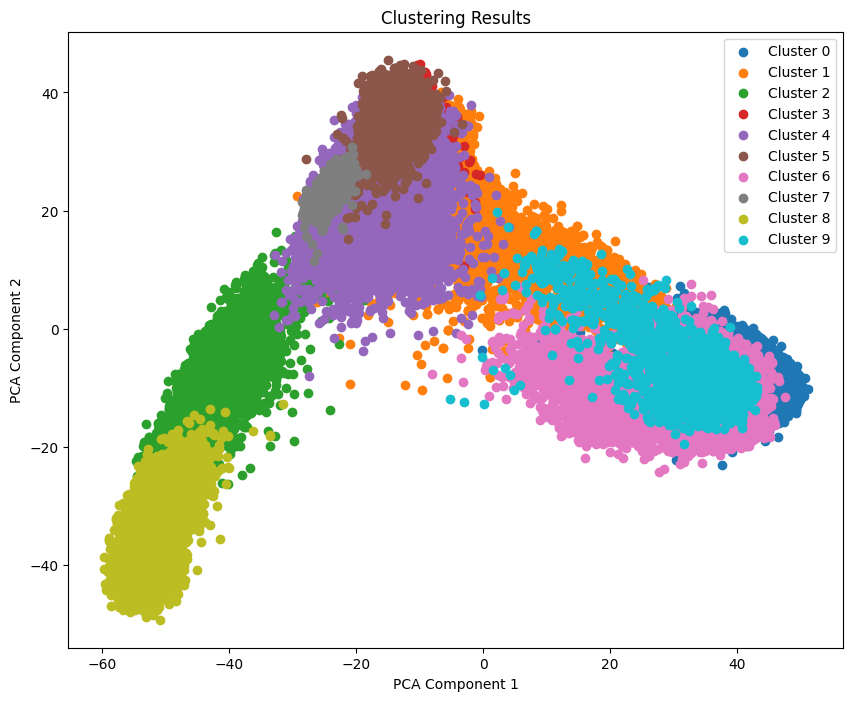

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'features' is a NumPy array containing extracted features
# Example: 
norm_features = np.load('norm_features.npy')

# Step 1: Perform K-Means clustering
num_clusters = 10  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(norm_features)
full_labels = kmeans.labels_

# Step 2: Perform PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
reduced_features = pca.fit_transform(norm_features)

# Step 3: Plot the clustering results
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_features[full_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
import os
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load extracted features
features_file = 'features.npy'  # Path to saved feature file
if not os.path.exists(features_file):
    raise FileNotFoundError(f"{features_file} not found. Ensure features are extracted and saved.")

features = np.load(features_file)

# Step 2: Perform K-Means clustering
num_clusters = 50  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_

# Step 3: Map image paths to clusters
PROCESSED_IMAGE_DIR = 'fashion-dataset/images'
image_paths = [os.path.join(PROCESSED_IMAGE_DIR, fname) for fname in os.listdir(PROCESSED_IMAGE_DIR) if os.path.isfile(os.path.join(PROCESSED_IMAGE_DIR, fname))]

# Group image paths by cluster
clustered_images = {i: [] for i in range(num_clusters)}
for img_path, label in zip(image_paths, labels):
    clustered_images[label].append(img_path)

# Step 4: Display 5 images from each cluster
def display_images_from_cluster(clustered_images, num_images=5):
    for cluster_id, img_paths in clustered_images.items():
        print(f"\nCluster {cluster_id}:")
        selected_images = img_paths[:num_images]  # Select first 'num_images' images (or random subset)
        
        plt.figure(figsize=(15, 5))
        for i, img_path in enumerate(selected_images):
            img = Image.open(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Cluster {cluster_id}")
        plt.show()

# Display images from each cluster
display_images_from_cluster(clustered_images)



Cluster 0:


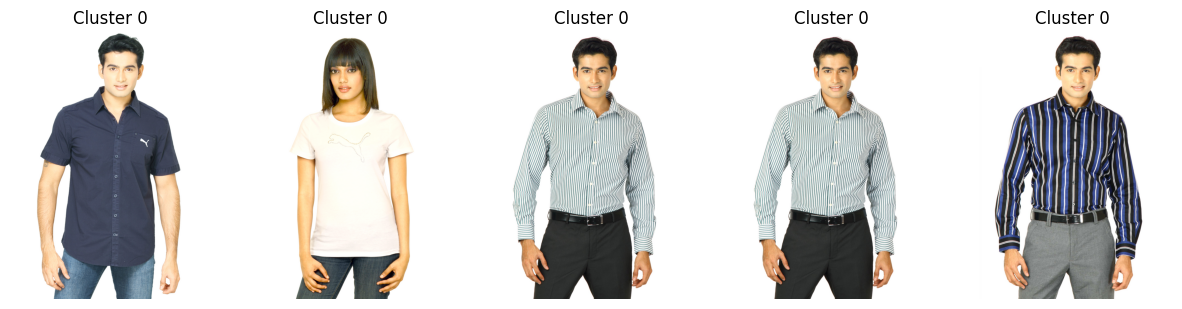


Cluster 1:


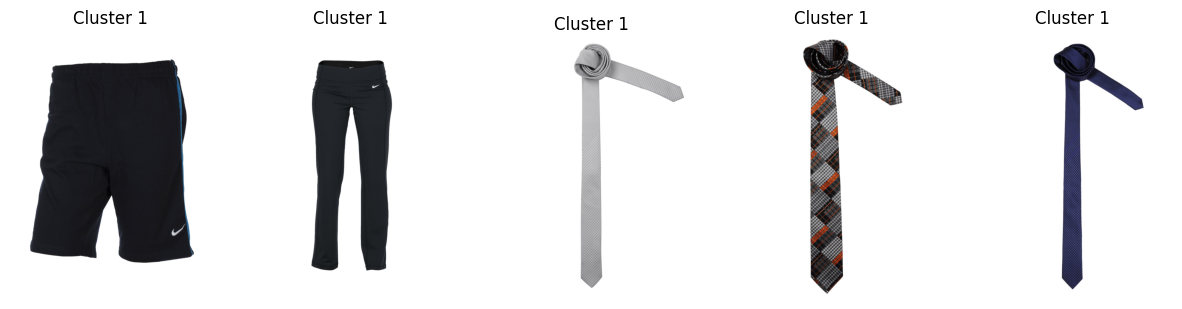


Cluster 2:


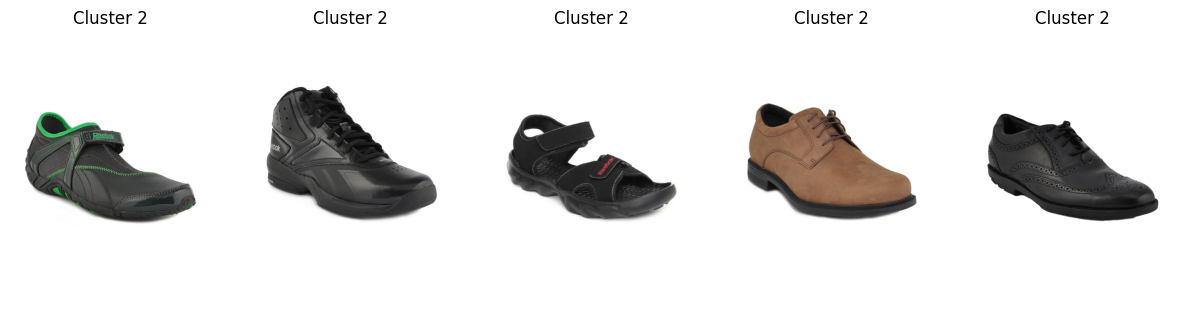


Cluster 3:


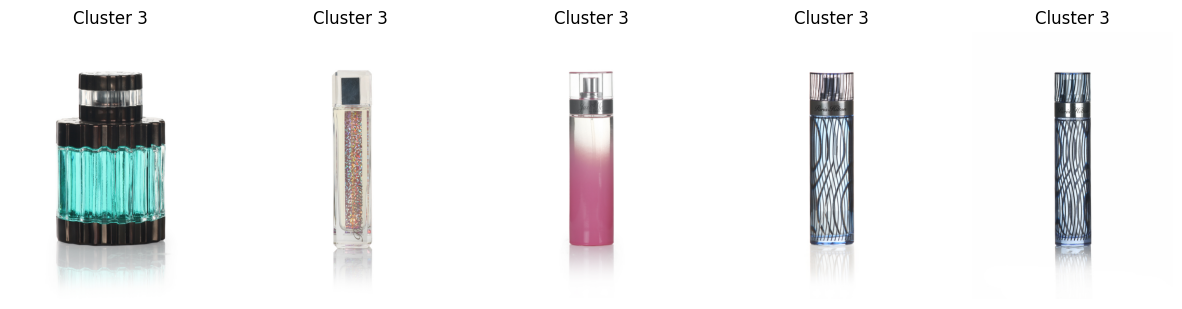


Cluster 4:


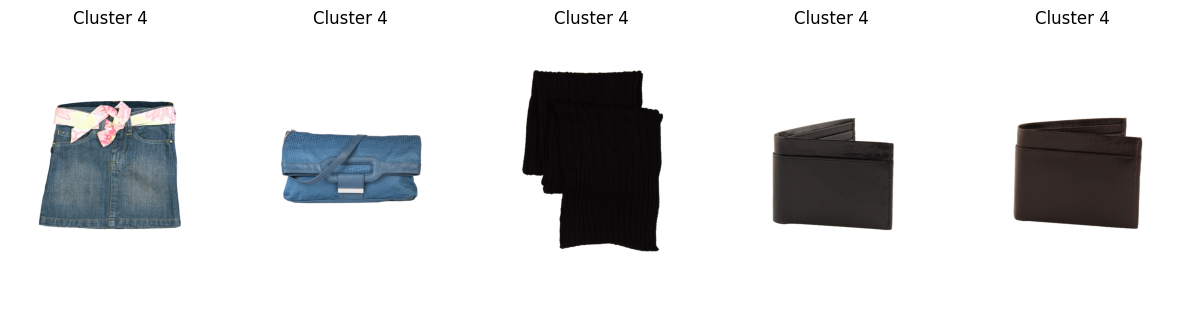


Cluster 5:


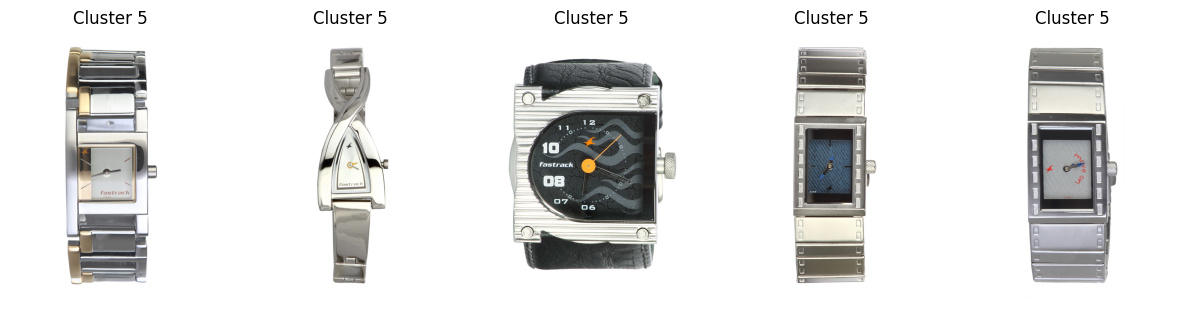


Cluster 6:


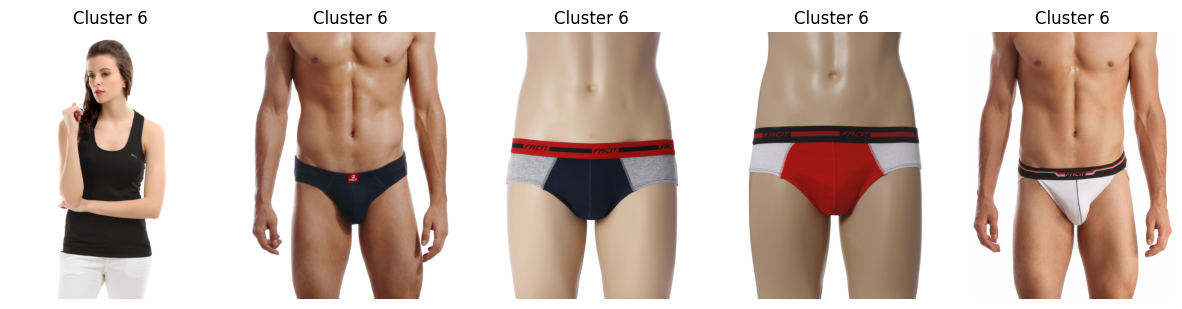


Cluster 7:


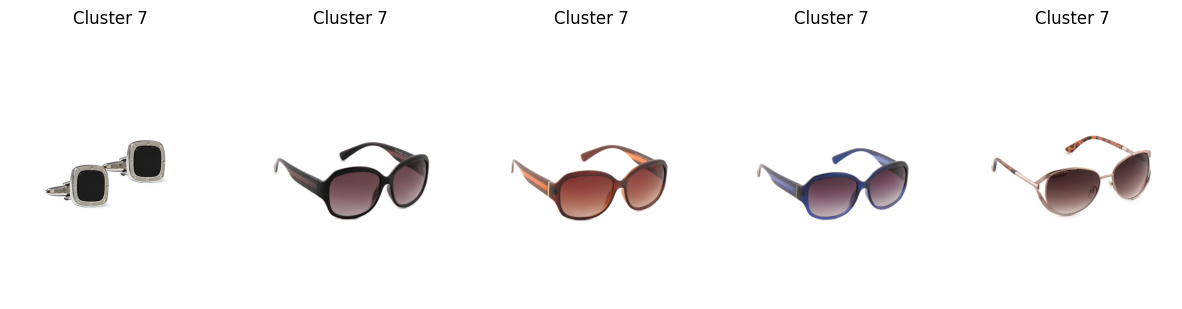


Cluster 8:


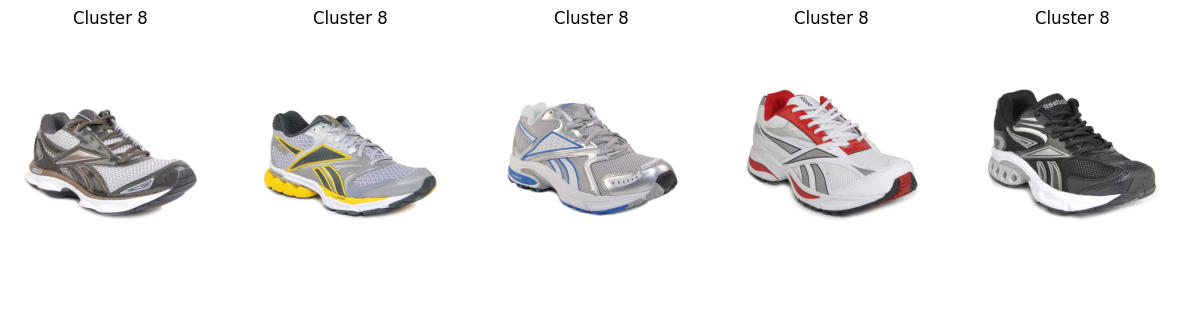


Cluster 9:


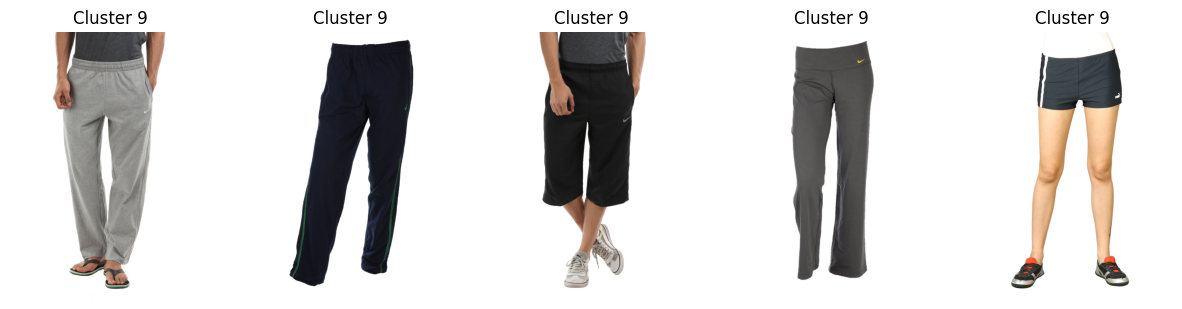


Cluster 10:


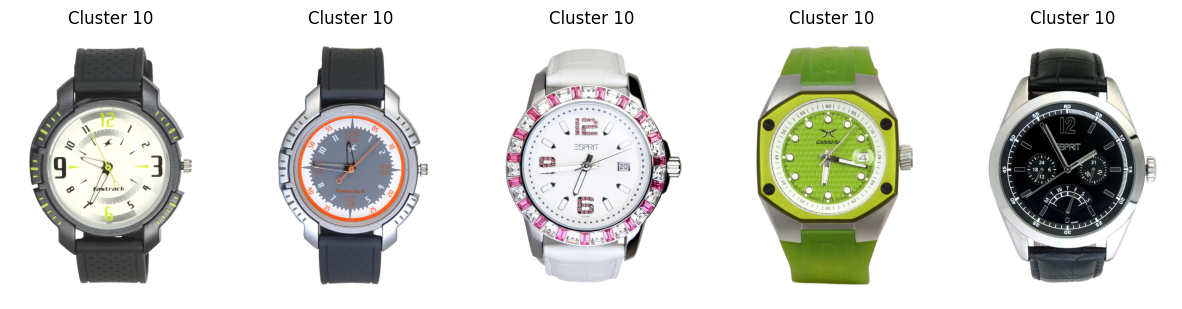


Cluster 11:


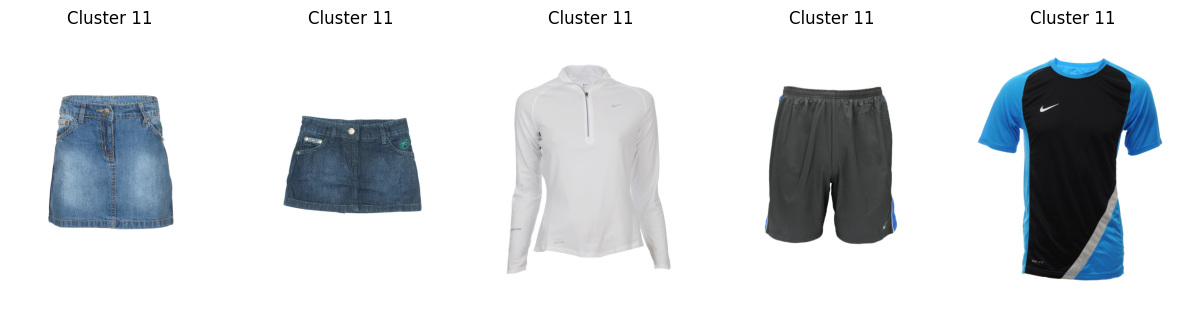


Cluster 12:


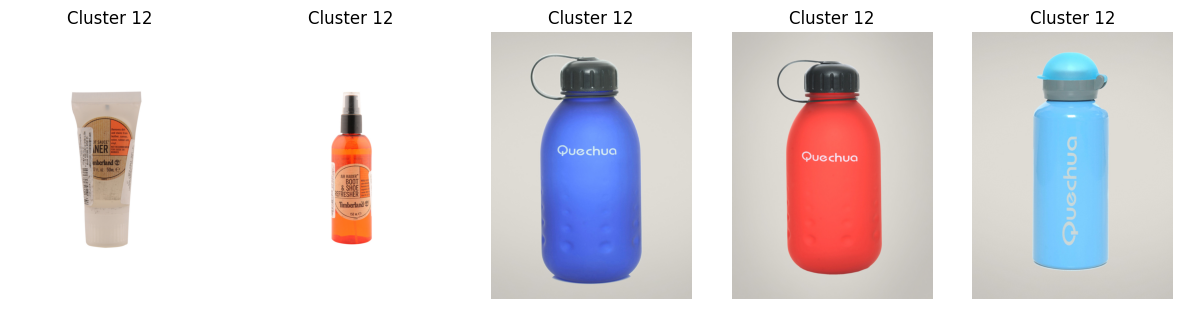


Cluster 13:


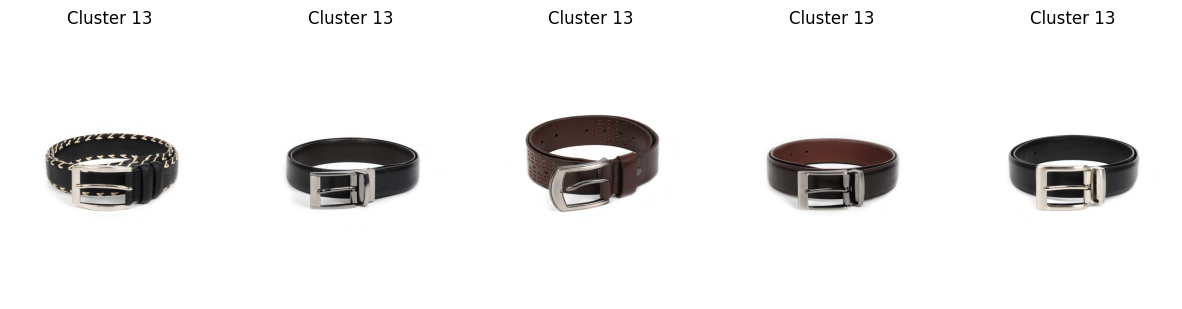


Cluster 14:


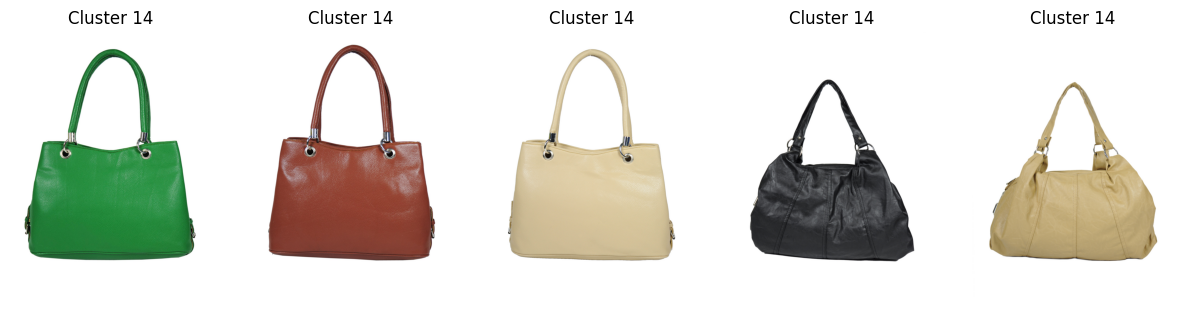


Cluster 15:


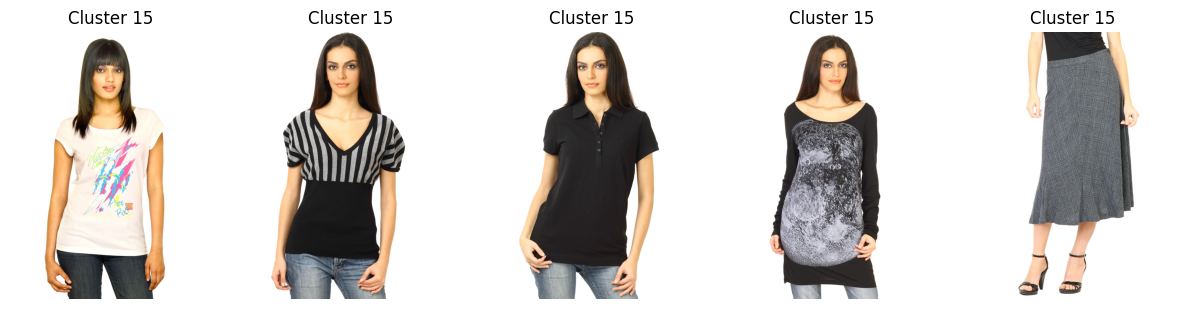


Cluster 16:


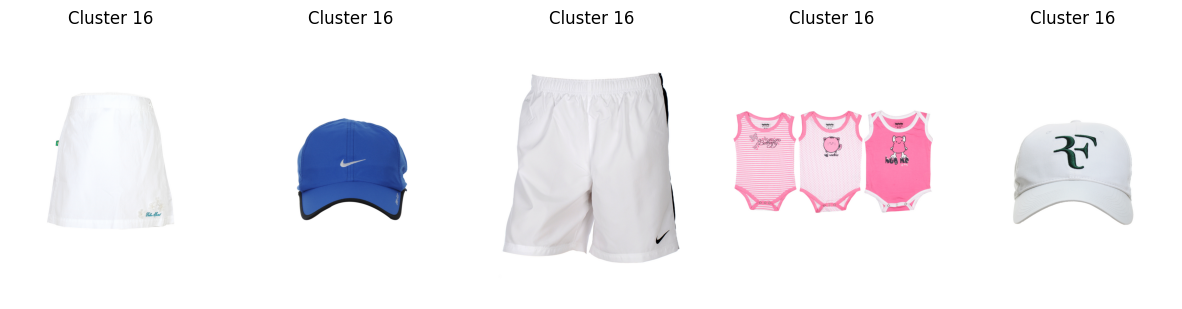


Cluster 17:


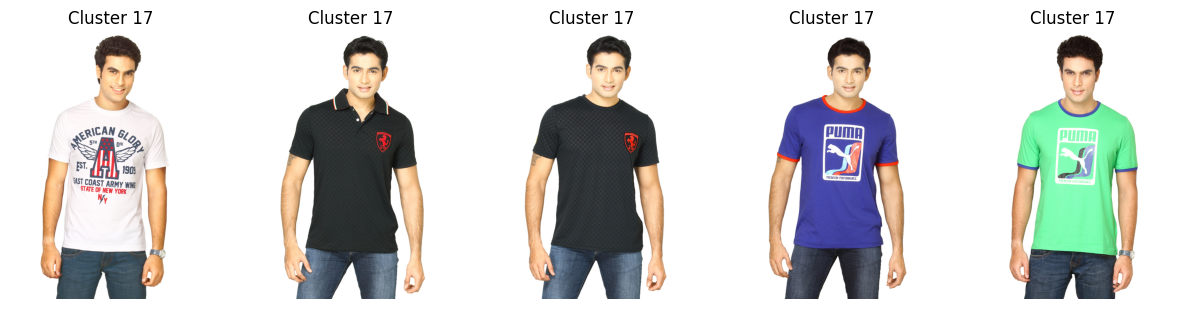


Cluster 18:


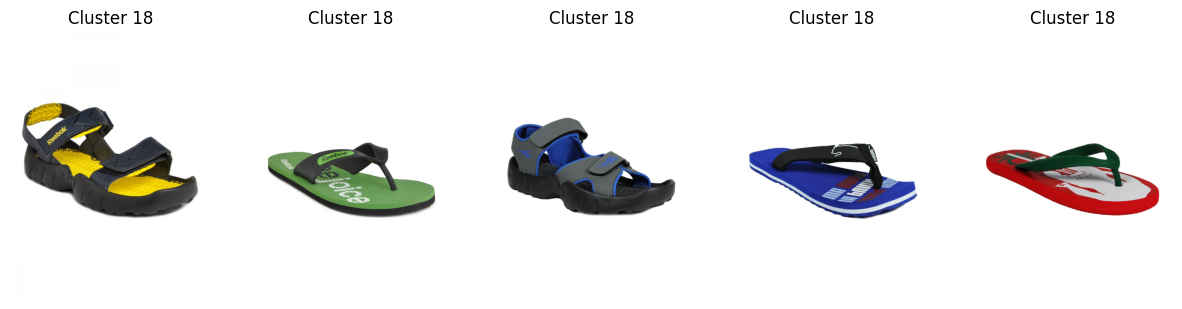


Cluster 19:


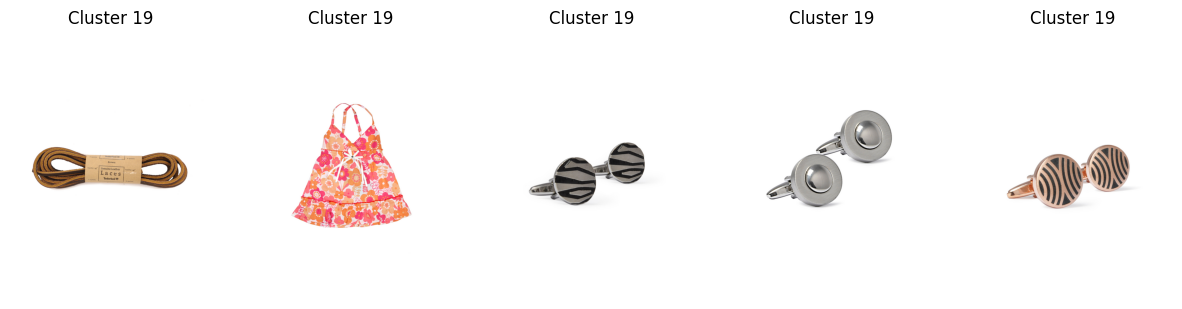

In [1]:
import os
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load extracted features
features_file = 'norm_features.npy'  # Path to saved feature file
if not os.path.exists(features_file):
    raise FileNotFoundError(f"{features_file} not found. Ensure features are extracted and saved.")

norm_features = np.load(features_file)

# Step 2: Perform K-Means clustering
num_clusters = 20  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(norm_features)
full_labels = kmeans.labels_

# Step 3: Map image paths to clusters
PROCESSED_IMAGE_DIR = 'fashion-dataset/images'
image_paths = [os.path.join(PROCESSED_IMAGE_DIR, fname) for fname in os.listdir(PROCESSED_IMAGE_DIR) if os.path.isfile(os.path.join(PROCESSED_IMAGE_DIR, fname))]

# Group image paths by cluster
clustered_images = {i: [] for i in range(num_clusters)}
for img_path, full_labels in zip(image_paths, full_labels):
    clustered_images[full_labels].append(img_path)

# Step 4: Display 5 images from each cluster
def display_images_from_cluster(clustered_images, num_images=5):
    for cluster_id, img_paths in clustered_images.items():
        print(f"\nCluster {cluster_id}:")
        selected_images = img_paths[:num_images]  # Select first 'num_images' images (or random subset)
        
        plt.figure(figsize=(15, 5))
        for i, img_path in enumerate(selected_images):
            img = Image.open(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Cluster {cluster_id}")
        plt.show()

# Display images from each cluster
display_images_from_cluster(clustered_images)
